In [1]:
# Imports
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading Data
df = pd.read_csv('houseprice.csv')

In [3]:
df.head()

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace,Price
0,1.982,1.0,3,2.00,133,0,14.2212
1,1.676,1.5,3,0.38,14,1,13.4865
2,1.694,2.0,3,0.96,15,1,11.8007
3,1.800,1.0,2,0.48,49,1,13.8297
4,2.088,1.0,3,1.84,29,1,12.9470


In [4]:
# See data summary
df.describe()

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace,Price
count,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000
mean,1.807303,1.918338,3.183381,0.569580,28.061127,0.593123,16.386213
std,0.641461,0.641735,0.750265,0.777879,34.900899,0.491486,6.765156
min,0.672000,1.000000,1.000000,0.000000,0.000000,0.000000,1.685800
25%,1.336000,1.500000,3.000000,0.210000,6.000000,0.000000,11.201400
50%,1.672000,2.000000,3.000000,0.390000,18.000000,1.000000,15.191700
75%,2.206000,2.500000,4.000000,0.600000,34.000000,1.000000,20.523500
max,4.534000,4.500000,6.000000,9.000000,247.000000,1.000000,44.643600


In [5]:
# See datatypes, and check if null values are present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Living Area  1047 non-null   float64
 1   Bathrooms    1047 non-null   float64
 2   Bedrooms     1047 non-null   int64  
 3   Lot Size     1047 non-null   float64
 4   Age          1047 non-null   int64  
 5   Fireplace    1047 non-null   int64  
 6   Price        1047 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 57.4 KB


In [6]:
# Select featues and target variables
X = df[['Living Area', 'Lot Size', 'Age']]
Y = df['Price']

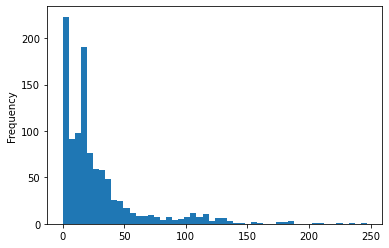

In [8]:
# Ploting to analyse features of the data
X['Age'].plot(kind='hist', bins=50)

In [9]:
# Split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [10]:
#Training
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [11]:
#intercept and coff
print(regressor.intercept_)
print(regressor.coef_)

3.4573700664448275
[ 7.58011147  0.07620194 -0.03367248]


In [12]:
# prediction
y_predict=regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df

,Actual,Predicted
897,9.4486,10.685145
736,13.8914,14.812000
767,14.8401,16.325896
793,14.2302,12.813668
887,8.9893,9.145431
...,...,...
397,16.8497,17.596304
412,17.3794,17.829044
278,21.0081,14.818000
190,18.9654,20.554000


In [14]:
y_train_predict = regressor.predict(x_train)

In [16]:
#Accuracy of train data
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

Mean Absolute Error: 2.8033632679873386
Mean Squared Error: 16.33088106733752
Root Mean Squared Error: 4.041148483703305


In [13]:
#Accuracy of test data
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 3.0608161493827954
Mean Squared Error: 19.34592799583318
Root Mean Squared Error: 4.3984006179329755


## Random Forest

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rf=RandomForestRegressor(n_estimators=100, max_depth=20)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=20)

In [45]:
# prediction
y_predict=rf.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df

,Actual,Predicted
897,9.4486,10.981031
736,13.8914,13.364511
767,14.8401,12.623357
793,14.2302,11.841643
887,8.9893,9.784970
...,...,...
397,16.8497,16.076777
412,17.3794,18.718051
278,21.0081,13.823644
190,18.9654,21.289877


In [46]:
y_train_predict = rf.predict(x_train)
#Accuracy of train data
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

Mean Absolute Error: 1.0056305458071217
Mean Squared Error: 2.319995863203536
Root Mean Squared Error: 1.5231532632022085


In [47]:
#Accuracy of test data
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 3.073942018276816
Mean Squared Error: 19.97116976606749
Root Mean Squared Error: 4.468911474404868


## Gradient boosting

In [80]:
from sklearn import ensemble

In [85]:
reg = ensemble.GradientBoostingRegressor()
reg.fit(x_train, y_train)

GradientBoostingRegressor()

In [86]:
# prediction
y_predict=reg.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df

,Actual,Predicted
897,9.4486,11.830347
736,13.8914,12.276967
767,14.8401,14.514628
793,14.2302,11.327515
887,8.9893,10.214286
...,...,...
397,16.8497,18.438760
412,17.3794,17.649387
278,21.0081,12.145753
190,18.9654,21.500760


In [87]:
y_train_predict = reg.predict(x_train)
#Accuracy of train data
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

Mean Absolute Error: 1.9963269351080175
Mean Squared Error: 8.085828920845003
Root Mean Squared Error: 2.843559199462006


In [88]:
#Accuracy of test data
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 2.951781272772992
Mean Squared Error: 18.96672339902779
Root Mean Squared Error: 4.3550801828471295
